In [1]:
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib


from sklearn import svm
#from multi_class_classifiers import XGboost_classifier, RandomForest_classifier, AdaBoost_classifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, balanced_accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier

import numpy as np
import pandas as pd


### Import data from CSV file

In [2]:
# load feature_mat.csv;
import csv

with open('feature_mat_v8.csv', 'r') as f:
    A = csv.reader(f)
    temp = list(A)
print(temp[0])
np_all = temp[1:]
#print(X)
#X = np.genfromtxt('role_stat.csv', delimiter=',')
np_all = np.array(np_all)
print(np_all.shape)
print(np_all[0,:])
N,p = np_all.shape[0], np_all.shape[0]-1

['ANON_ID', 'label', 'gender_bool', 'age', 'chemo_dx_hist', 'other_long_therapy_dx_hist', 'MDS_dx_hist', 'Thrombocytopenia_dx_hist', 'Neoplasm_dx_hist', 'skin_eruption_dx_hist', 'Sezary_dx_hist', 'myelodysplastic_dx_hist', 'hypertension_dx_hist', 'Myelofibrosis_dx_hist', 'Mycosis_dx_hist', 'Cancer_med_hist', 'Other_med_hist', 'CAD_med_hist', 'abn_WBC', 'avg_WBC', 'abn_Hgb', 'avg_Hgb', 'abn_RDW', 'avg_RDW', 'abn_MCV', 'avg_MCV', 'abn_Esn', 'avg_Esn', 'abn_Mnc', 'avg_Mnc', 'abn_MCH', 'avg_MCH', 'abn_LDH', 'avg_LDH', 'abn_CD34', 'avg_CD34', 'abn_CD3PanT', 'avg_CD3PanT', 'abn_CD48', 'avg_CD48', 'abn_CD19', 'avg_CD19', 'abn_Anion', 'avg_Anion', 'abn_IgG', 'avg_IgG', 'abn_Basophils', 'avg_Basophils', 'abn_RBC', 'avg_RBC', 'abn_Globulin', 'avg_Globulin', 'abn_Lym', 'avg_Lym', 'abn_Ntr', 'avg_Ntr', 'abn_BUN', 'avg_BUN', 'abn_eGFR', 'avg_eGFR', 'abn_Albumin', 'avg_Albumin', 'abn_Glc', 'avg_Glc', 'abn_Cal', 'avg_Cal', 'abn_Crt', 'abn_Alk', 'DEXAMETHASONE_med_hist', 'IV_BOLUS_med_hist', 'ONDANSET

### Feature Matrix and Labels

In [3]:
# split the data and prepare for training

X_all = np_all[:,2:].astype(float)
Y_all = np_all[:,1].astype(float).astype(int)


### Preleminary Feature Anaysis and Normalization



In [4]:

# normalize the features
print(temp[0][2:])
#print(X_all[100:110,:])

print('max of features: ', np.max(X_all,axis=0))
print('min of features: ', np.min(X_all,axis=0))

# Exclude some of the features
#X_all = X_all[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]] # exclude 4 and 13
print(X_all.shape)

print(np.where(Y_all==0)[0].shape[0])
print(np.where(Y_all==1)[0].shape[0])
# normalize
X_all = X_all / np.max(X_all,axis=0)
#print('Normalized feature matrix: ')
#print(X_all)
print(np.mean(X_all[:,5]))

['gender_bool', 'age', 'chemo_dx_hist', 'other_long_therapy_dx_hist', 'MDS_dx_hist', 'Thrombocytopenia_dx_hist', 'Neoplasm_dx_hist', 'skin_eruption_dx_hist', 'Sezary_dx_hist', 'myelodysplastic_dx_hist', 'hypertension_dx_hist', 'Myelofibrosis_dx_hist', 'Mycosis_dx_hist', 'Cancer_med_hist', 'Other_med_hist', 'CAD_med_hist', 'abn_WBC', 'avg_WBC', 'abn_Hgb', 'avg_Hgb', 'abn_RDW', 'avg_RDW', 'abn_MCV', 'avg_MCV', 'abn_Esn', 'avg_Esn', 'abn_Mnc', 'avg_Mnc', 'abn_MCH', 'avg_MCH', 'abn_LDH', 'avg_LDH', 'abn_CD34', 'avg_CD34', 'abn_CD3PanT', 'avg_CD3PanT', 'abn_CD48', 'avg_CD48', 'abn_CD19', 'avg_CD19', 'abn_Anion', 'avg_Anion', 'abn_IgG', 'avg_IgG', 'abn_Basophils', 'avg_Basophils', 'abn_RBC', 'avg_RBC', 'abn_Globulin', 'avg_Globulin', 'abn_Lym', 'avg_Lym', 'abn_Ntr', 'avg_Ntr', 'abn_BUN', 'avg_BUN', 'abn_eGFR', 'avg_eGFR', 'abn_Albumin', 'avg_Albumin', 'abn_Glc', 'avg_Glc', 'abn_Cal', 'avg_Cal', 'abn_Crt', 'abn_Alk', 'DEXAMETHASONE_med_hist', 'IV_BOLUS_med_hist', 'ONDANSETRON_med_hist', 'LIDO

### Determine N_train; number of train samples

In [5]:
N_train = 850

### shuffle_data; a function for shuffling the data and creating train and test sets

In [6]:
def shuffle_data():
    I = np.random.permutation(N)
    X_perm = X_all[I,:]
    Y_perm = Y_all[I]

    # train and test data
    X_train = X_perm[:N_train,:].astype(float)
    X_test = X_perm[N_train:,].astype(float)

    Y_train = Y_perm[:N_train].astype(float).astype(int)
    Y_test = Y_perm[N_train:].astype(float).astype(int)
    return X_train, Y_train , X_test, Y_test


### predict_model: a function that gets the train and test sets and outputs the predicted labels as well as the assiciated probability scores for the test set 

In [7]:
from xgboost import XGBClassifier

def predict_model(X_train, Y_train , X_test, Y_test):
    eval_set = [(X_test, Y_test)]
    clf = XGBClassifier(n_estimators = 300, learning_rate = 0.03, max_depth=5, subsample = 0.5)
    clf.fit(X_train, Y_train, early_stopping_rounds=20, eval_metric="logloss", eval_set=eval_set, verbose=False)
    Y_pred = clf.predict(X_test)
    Y_pred_prob = clf.predict_proba(X_test)[:,1]
    return Y_pred, Y_pred_prob


### get_TNR: finding the True Negative Rate (TNR) for a fixed Negative Predictive Value (NPV), based on the true test labels (Y_test) and predicted probabilities (Y_pred_prob)

In [8]:
from sklearn.metrics import confusion_matrix

def get_TNR(x, Y_test, Y_pred_prob):
    num = 50
    Thr = np.linspace(0.15,0.50,num = num)
    NPV_vec= np.zeros(num)
    TNR_vec = np.zeros(num)
    y = 0
    for i in range(num):
        Y_pred_2 = (Y_pred_prob >= Thr[i] ).astype(bool)
        tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_2).ravel()
        NPV_vec[i] = tn/(fn+tn)
        TNR_vec[i] = tn/(tn+fp)
        if  NPV_vec[i] >= x and TNR_vec[i]>=y:
            y= TNR_vec[i]
    return y

### get_TNR_vec: find True Negative Rate (TNR) for a fixed Negative Predictive Value (NPV) for N iterations and find mean, std, Confidence Interval

In [11]:
def get_TNR_vec(x,N):
    
    TNR = np.zeros(N)
    
    for i in range(N):
        #print(i)

        
        # Shuffle data
        X_train, Y_train , X_test, Y_test = shuffle_data()

        # predict model
        Y_pred, Y_pred_prob = predict_model(X_train, Y_train , X_test, Y_test)

        # get TNR
        TNR[i]= get_TNR(x, Y_test, Y_pred_prob)
        #print(i, TNR[i])
    
    #print(np.nonzero(TNR)[0])
    A = TNR[np.nonzero(TNR)[0]]
    return np.mean(A), np.std(A), np.percentile(A, 5) , np.percentile(A, 95) 

### Get TNR for a sample NPV. of 0.97

In [10]:
print(get_TNR_vec(0.97,50))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':


0 0.046296296296296294
1 0.031578947368421054
2 0.010416666666666666
3 0.07
4 0.0
5 0.0
6 0.009615384615384616
7 0.0
8 0.0
9 0.009523809523809525
10 0.0
11 0.019230769230769232
12 0.009615384615384616
13 0.017391304347826087
14 0.010309278350515464
15 0.0
16 0.0
17 0.0
18 0.008771929824561403
19 0.020202020202020204
20 0.0
21 0.04807692307692308
22 0.0196078431372549
23 0.009708737864077669
24 0.05714285714285714
25 0.03361344537815126
26 0.0
27 0.021052631578947368
28 0.009708737864077669
29 0.01
30 0.009708737864077669
31 0.011363636363636364
32 0.018867924528301886
33 0.05154639175257732
34 0.0
35 0.009009009009009009
36 0.0
37 0.01904761904761905
38 0.009345794392523364
39 0.0
40 0.0
41 0.0196078431372549
42 0.0
43 0.018867924528301886
44 0.02830188679245283
45 0.0
46 0.0
47 0.029411764705882353
48 0.01904761904761905
49 0.0
[ 0  1  2  3  6  9 11 12 13 14 18 19 21 22 23 24 25 27 28 29 30 31 32 33
 35 37 38 41 43 44 47 48]
(0.022374659945412496, 0.015839172510171556, 0.0091942409699

### Get NPV and TNR for a range of numbers

In [25]:
NPV= np.linspace(0.3,0.97, 10)
TNR = np.zeros(10)
for i in range(NPV.shape[0]):
    TNR[i] = get_TNR_vec(NPV[i],50)[0]
print(TNR)

0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':


0 0.5060240963855421
1
1 0.5157894736842106
2
2 0.3305785123966942
3
3 0.4117647058823529
4
4 0.3684210526315789
5
5 0.3235294117647059
6
6 0.45918367346938777
7
7 0.37383177570093457
8
8 0.44
9
9 0.42857142857142855
10
10 0.4811320754716981
11
11 0.36607142857142855
12
12 0.3523809523809524
13
13 0.5053763440860215
14
14 0.3611111111111111
15
15 0.37037037037037035
16
16 0.43119266055045874
17
17 0.34579439252336447
18
18 0.3333333333333333
19
19 0.32710280373831774
20
20 0.4387755102040816
21
21 0.4336283185840708
22
22 0.39166666666666666
23
23 0.38613861386138615
24
24 0.43564356435643564
25
25 0.40594059405940597
26
26 0.4174757281553398
27
27 0.38613861386138615
28
28 0.4074074074074074
29
29 0.47058823529411764
30
30 0.4375
31
31 0.330188679245283
32
32 0.4270833333333333
33
33 0.4
34
34 0.31896551724137934
35
35 0.4019607843137255
36
36 0.4105263157894737
37
37 0.36538461538461536
38
38 0.3944954128440367
39
39 0.44339622641509435
40
40 0.3557692307692308
41
41 0.44
42
42 0.353

16 0.020833333333333332
17
17 0.01
18
18 0.0
19
19 0.0
20
20 0.05309734513274336
21
21 0.0
22
22 0.0
23
23 0.01020408163265306
24
24 0.0
25
25 0.0
26
26 0.0
27
27 0.019801980198019802
28
28 0.045871559633027525
29
29 0.010526315789473684
30
30 0.010638297872340425
31
31 0.05504587155963303
32
32 0.010101010101010102
33
33 0.0
34
34 0.009345794392523364
35
35 0.0
36
36 0.05263157894736842
37
37 0.009900990099009901
38
38 0.030612244897959183
39
39 0.0
40
40 0.0
41
41 0.02912621359223301
42
42 0.0594059405940594
43
43 0.030303030303030304
44
44 0.019417475728155338
45
45 0.009708737864077669
46
46 0.058823529411764705
47
47 0.01904761904761905
48
48 0.0
49
49 0.09900990099009901
0
0 0.0
1
1 0.0
2
2 0.09803921568627451
3
3 0.027522935779816515
4
4 0.0
5
5 0.009523809523809525
6
6 0.10309278350515463
7
7 0.008771929824561403
8
8 0.08849557522123894
9
9 0.018867924528301886
10
10 0.009900990099009901
11
11 0.009345794392523364
12
12 0.030612244897959183
13
13 0.026785714285714284
14
14 0.0


### Plot the graph

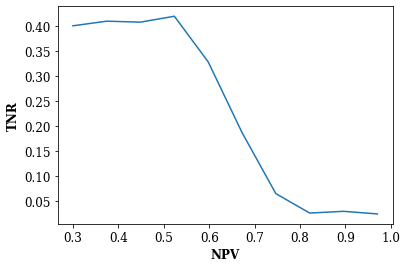

In [26]:
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib

from sklearn.metrics import roc_curve
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams.update({'font.size': 12})
plt.rcParams['axes.labelweight'] = 'bold'
import time


plt.plot(NPV,TNR)

plt.xlabel('NPV')
plt.ylabel('TNR')

plt.show()